In [4]:
import pandas as pd
from datetime import datetime
import numpy as np

In [5]:
data = pd.read_csv("history.csv", low_memory=False)
columns_to_remove = ['id', 'country_code', 'currency_code', 'net_of_fees', 'cashflows_custody_fee', 'fee_paid_separately', 'custody_fee_withdrawal',
                     'is_fee_exempt', 'include_client_consolidation', 'credit_limit_type', 'sss_type', 'sss_agent', 'is_midwest_clearing_account',
                     'terminal_code', 'target_grantor_grantee_flag', 'iso_funds_code', 'esir_number', 'shareholder_language', 'shareholder_language',
                     'conjunction', 'function_code', 'tms_settlement_location', 'portfolio_cost_method', 'portfolio_name_address_option',
                     'portfolio_report_option', 'portfolio_summary_option', 'interactive_portfolio_code', 'deceased_fair_market_value', 'rep_commission_rate',
                     'dup_trip_quad_code', 'special_fee_code', 'non_calendar_year_end', 'resp_specimen_plan', 'sss_location', 'last_maintenance_user', 'last_maintenance_time',
                     'retail_last_maintenance_user', 'retail_last_maintenance_time', 'arp_pension_origin']

cols_to_numerify_from_bool = ["is_registered", "is_active",
    "use_client_address", "is_spousal", "is_arp_locked",
    "use_hand_delivery", "use_mail", "share_name_address_to_issuer",
    "shareholder_instructions_received", "rrsp_limit_reached", "is_portfolio_account",
    "has_no_min_commission", "is_tms_eligible", "is_agent_bbs_participant",
    "is_parameters_account", "is_spousal_transfer", "spousal_age_flag", "has_multiple_name",
    "discretionary_trading_authorized", "receive_general_mailings", "has_discrete_auth",
    "is_non_objecting_beneficial_owner", "is_objecting_to_disclose_info", "consent_to_pay_for_mail",
    "consent_to_email_delivery", "has_received_instruction", "is_broker_account",
    "is_inventory_account", "is_gl_account", "is_control_account", "is_extract_eligible",
    "is_pledged", "is_resp", "use_original_date_for_payment_calc", "is_family_resp",
    "is_hrdc_resp", "is_plan_grandfathered", "is_olob", "visible_in_reports", 'inserted_at', 'updated_at']

cols_to_encode = ['class_id', 'type_code', 'debit_code', 'contract_type',
                  'branch', 'retail_plan',
                  'special_tag', 'guarantee_gtor_type', 'dividend_confirm_code', 'options_trading_type',
                  'interest_dividend_conversion_type']

cols_null_to_numeric = ['rep_commission_override', 'loan_limit_override', 'non_plan_book_value_flag']

cols_date_to_numeric = ['last_trade_date', 'inception_date', 'last_update_date', 'plan_effective_date',
                        'plan_end_date', 'rrif_original_date']

special_cols = ['language_code', 'title', 'risk_tolerance', 'investment_objective', 'mailing_consent', 'number_of_beneficiaries', 'label']

# drop useless columns
data = data.drop(columns=columns_to_remove)

# store for check later
data_columns = data.columns

data.columns

C:\Users\allan\AppData\Local\Temp\ipykernel_9400\591590506.py:1: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("history.csv")


Index(['type_code', 'is_registered', 'is_active', 'class_id', 'debit_code',
       'last_trade_date', 'contract_type', 'inception_date', 'branch',
       'use_client_address', 'retail_plan', 'is_spousal', 'is_arp_locked',
       'language_code', 'dividend_confirm_code', 'options_trading_type',
       'rep_commission_override', 'interest_dividend_conversion_type',
       'guarantee_gtor_type', 'use_hand_delivery', 'use_mail',
       'share_name_address_to_issuer', 'shareholder_instructions_received',
       'rrsp_limit_reached', 'is_portfolio_account', 'has_no_min_commission',
       'is_tms_eligible', 'is_agent_bbs_participant', 'is_parameters_account',
       'is_spousal_transfer', 'spousal_age_flag', 'has_multiple_name',
       'discretionary_trading_authorized', 'special_tag', 'title',
       'receive_general_mailings', 'loan_limit_override',
       'non_plan_book_value_flag', 'has_discrete_auth', 'last_update_date',
       'is_non_objecting_beneficial_owner', 'is_objecting_to_discl

In [6]:
# get an overview of what the dataset looks like
data.head()

,type_code,is_registered,is_active,class_id,debit_code,last_trade_date,contract_type,inception_date,branch,use_client_address,...,rrif_original_date,use_original_date_for_payment_calc,is_family_resp,is_hrdc_resp,is_plan_grandfathered,inserted_at,updated_at,is_olob,visible_in_reports,label
0,CASH SWEEP,f,t,3.0,0,NaN,NaN,2017-08-18,IAVM,f,...,NaN,NaN,NaN,NaN,NaN,2023-05-30 14:20:18.531115+00,2023-08-08 18:53:01.439561+00,f,f,Churn
1,RRIF,t,t,5.0,C,2022-07-04,18.0,2018-11-08,IAVM,t,...,2018-11-08,f,f,f,f,2023-05-30 14:20:18.531115+00,2023-08-10 21:47:25.370403+00,f,t,Churn
2,SPOUSAL RRSP,t,t,5.0,A,2018-07-05,16.0,2009-04-08,IAVM,f,...,2009-04-08,f,f,f,f,2023-05-30 14:20:18.531115+00,2023-08-10 21:47:25.370403+00,f,f,Churn
3,CASH,f,t,3.0,T,NaN,12.0,2021-01-04,IAVM,t,...,NaN,NaN,NaN,NaN,NaN,2023-05-30 14:20:18.531115+00,2023-08-08 18:53:01.439561+00,f,t,Churn
4,CASH,f,t,3.0,T,NaN,17.0,2017-07-21,IAVM,f,...,NaN,NaN,NaN,NaN,NaN,2023-05-30 14:20:18.531115+00,2023-08-08 20:52:08.352646+00,f,f,Churn


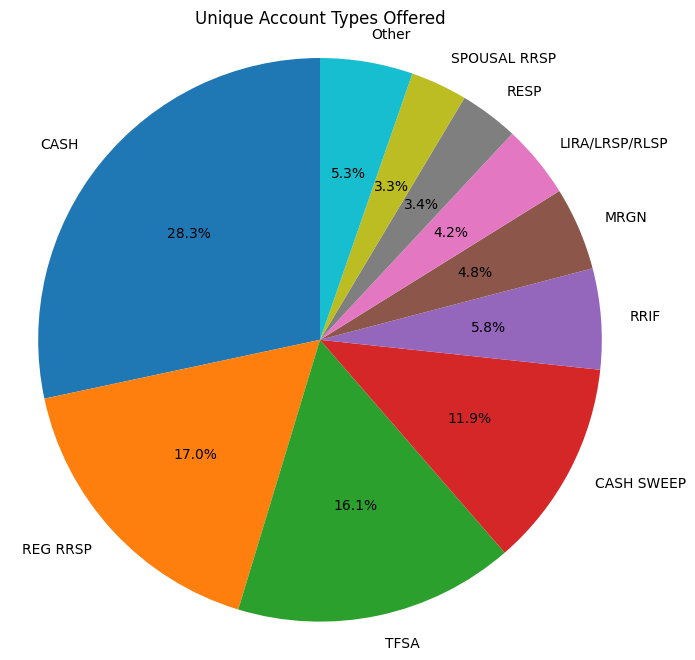

In [7]:
import matplotlib.pyplot as plt
counts = data['type_code'].value_counts()

# Combine elements with less than 2% occurrence into an 'other' category
total_count = counts.sum()
counts = counts[counts / total_count >= 0.02]
other_count = total_count - counts.sum()
counts['Other'] = other_count

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Unique Account Types Offered')
plt.show()

In [8]:
# bool to numeric function (cols_to_numerify_from_bool)
def bool_to_numeric(df, feature):
    bool_to_numeric_dict = {"t": 1, "f": 0}
    df[feature] = df[feature].map(bool_to_numeric_dict).fillna(-1)
    return df

for col in cols_to_numerify_from_bool:
  try:
    data = bool_to_numeric(data, col)
  except Exception as e:
    print(f'Error: {e}')
    continue

data[cols_to_numerify_from_bool].head()

,is_registered,is_active,use_client_address,is_spousal,is_arp_locked,use_hand_delivery,use_mail,share_name_address_to_issuer,shareholder_instructions_received,rrsp_limit_reached,...,is_pledged,is_resp,use_original_date_for_payment_calc,is_family_resp,is_hrdc_resp,is_plan_grandfathered,is_olob,visible_in_reports,inserted_at,updated_at
0,0,1,0,-1.0,-1.0,0,0,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,-1.0,-1.0
1,1,1,1,0.0,0.0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,-1.0,-1.0
2,1,1,0,1.0,0.0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-1.0,-1.0
3,0,1,1,-1.0,-1.0,0,0,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,-1.0,-1.0
4,0,1,0,-1.0,-1.0,0,0,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,-1.0,-1.0


In [9]:
# one hot encode function (cols_to_encode)
def encode_and_bind(original_dataframe, feature_to_encode):
    temp = pd.get_dummies(original_dataframe[[feature_to_encode]])
    df = pd.concat([original_dataframe, temp], axis=1)
    df = df.drop([feature_to_encode], axis=1)
    return(df)

for col in cols_to_encode:
  try:
    data = encode_and_bind(data, col)
  except Exception as e:
    print(f'Error: {e}')
    continue

data.head()

,is_registered,is_active,last_trade_date,inception_date,use_client_address,is_spousal,is_arp_locked,language_code,rep_commission_override,use_hand_delivery,...,retail_plan_TF,special_tag_CURATELLE,special_tag_ESTATE OF,special_tag_FIDUCIE,special_tag_JTIC,special_tag_JTWROS,special_tag_NOT FOUND,special_tag_SUCCESSION,special_tag_TRUST,special_tag_TUTELLE
0,0,1,NaN,2017-08-18,0,-1.0,-1.0,E,0.0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,2022-07-04,2018-11-08,1,0.0,0.0,E,0.0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,2018-07-05,2009-04-08,0,1.0,0.0,F,0.0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,1,NaN,2021-01-04,1,-1.0,-1.0,E,0.0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,1,NaN,2017-07-21,0,-1.0,-1.0,E,0.0,0,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# for these, null = 0, has value = 1 (cols_null_to_numeric)
def null_to_numeric(df, feature):
  df[feature] = df[feature].notnull().astype(int)
  return df

for col in cols_null_to_numeric:
  try:
    data = null_to_numeric(data, col)
  except Exception as e:
    print(f'Error: {e}')
    continue

data[cols_null_to_numeric].head()

,rep_commission_override,loan_limit_override,non_plan_book_value_flag
0,1,0,1
1,1,0,0
2,1,0,0
3,1,0,1
4,1,0,1


In [11]:
# modifying (cols_date_to_numeric)
date_format = "%Y-%m-%d"

# Assuming `data` is your DataFrame and `date_columns` is a list of date columns
for column in cols_date_to_numeric:
    try:
        # Convert to datetime
        data[column] = pd.to_datetime(data[column], errors='coerce')

        # Calculate the difference in days from today
        data[column] = (datetime.now() - data[column]).dt.days

    except Exception as e:
        print(f'Error: {e}')
        continue

# Calculate the average of non-null values for each column
column_averages = {column: data[column].dropna().mean() for column in cols_date_to_numeric}

# Replace null values with the average of non-null values
for column in cols_date_to_numeric:
    data[column] = data[column].fillna(column_averages[column])

data[cols_date_to_numeric].head()

,last_trade_date,inception_date,last_update_date,plan_effective_date,plan_end_date,rrif_original_date
0,1527.999573,2512.0,2021.917826,2465.864163,1838.417913,2622.012951
1,731.000000,2065.0,665.000000,2065.000000,1838.417913,2065.000000
2,2191.000000,5566.0,3725.000000,5566.000000,2179.000000,5566.000000
3,1527.999573,1277.0,1277.000000,2465.864163,1838.417913,2622.012951
4,1527.999573,2540.0,2537.000000,2465.864163,1838.417913,2622.012951


In [12]:
# SPECIAL COLUMN: language_code
# english = 0 , french = 1
def update_language(df, feature):
  language_to_numeric_dict = {"F": 1, "E": 0}
  df[feature] = df[feature].map(language_to_numeric_dict)
  return df

data = update_language(data, 'language_code')

data['language_code'].head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: language_code, dtype: float64

In [13]:
# SPECIAL COLUMN: title
def gender_to_number(df, feature):
    mapping = {
        'male': ['mr', 'monsieur', 'sir', 'mister'],
        'female': ['miss', 'ms', 'mrs', 'madame', 'mme', 'mlle', 'mademoiselle', 'mm']
    }
    for key in mapping.keys():
        mapping[key] = [phrase.lower() for phrase in mapping[key]]

    def map_gender(value):
        try:
            value_lower = str(value).lower()
            if pd.isna(value) or value == "":
                return "none_provided"
            elif any(phrase in value_lower for phrase in mapping['male']):
                return "male"
            elif any(phrase in value_lower for phrase in mapping['female']):
                return "female"
            else:
                return "other"
        except AttributeError:
            return "none_provided"
    df[feature] = df[feature].apply(map_gender)
    df = encode_and_bind(df, feature)
    return df

data = gender_to_number(data, 'title')

In [14]:
# SPECIAL COLUMN: risk_tolerance, investment_objective
def convert_risk_to_numeric(df, feature):

    unique_risks = set()

    for idx, row in df.iterrows():
        risk_str = row[feature]
        risk_str = str(risk_str)
        if pd.notna(risk_str):
            for char in risk_str:
                if char.isalpha():
                    unique_risks.add(char)

    col_names = [f'{feature}_{risk}' for risk in unique_risks]

    for col_name in col_names:
        df[col_name] = 0

    df[f'{feature}_exists'] = 1

    for idx, row in df.iterrows():
        risk_str = row[feature]
        risk_str = str(risk_str)
        if pd.notna(risk_str):
            for i in range(len(risk_str)):
                if risk_str[i].isalpha():
                    col_name = f'{feature}_{risk_str[i]}'
                    j = i + 1
                    while j < len(risk_str) and risk_str[j].isdigit():
                        j += 1
                    try:
                        value = int(risk_str[i + 1:j]) if j > i + 1 else 0
                    except (ValueError, IndexError):
                        value = 0
                        df.at[idx, f'{feature}_exists'] = 0
                    df.at[idx, col_name] = value
    df = df.fillna(0)
    df.drop(columns=[feature], inplace=True)

    return df

data = convert_risk_to_numeric(data, 'risk_tolerance')
data = convert_risk_to_numeric(data, 'investment_objective')

data.head()

,is_registered,is_active,last_trade_date,inception_date,use_client_address,is_spousal,is_arp_locked,language_code,rep_commission_override,use_hand_delivery,...,investment_objective_C,investment_objective_S,investment_objective_M,investment_objective_I,investment_objective_L,investment_objective_X,investment_objective_G,investment_objective_D,investment_objective_V,investment_objective_exists
0,0,1,1527.999573,2512.0,0,-1.0,-1.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,731.000000,2065.0,1,0.0,0.0,0.0,1,0,...,0,10,0,0,0,0,85,0,0,1
2,1,1,2191.000000,5566.0,0,1.0,0.0,1.0,1,0,...,0,50,0,0,0,0,50,0,0,1
3,0,1,1527.999573,1277.0,1,-1.0,-1.0,0.0,1,0,...,0,0,0,0,0,0,99,0,0,1
4,0,1,1527.999573,2540.0,0,-1.0,-1.0,0.0,1,0,...,0,0,0,0,0,0,99,0,0,1


In [15]:
# SPECIAL COLUMNS: mailing_consent, number_of_beneficiaries, label
data['mailing_consent'] = data['mailing_consent'].fillna(0)
data['number_of_beneficiaries'] = data['number_of_beneficiaries'].fillna(0)
data['label'] = data['label'].map({'Churn': 1, 'No Churn': 0})

# fill all other null cells with -1
data = data.fillna(-1)

In [16]:
# THE FINAL DATASET
data.head()

,is_registered,is_active,last_trade_date,inception_date,use_client_address,is_spousal,is_arp_locked,language_code,rep_commission_override,use_hand_delivery,...,investment_objective_C,investment_objective_S,investment_objective_M,investment_objective_I,investment_objective_L,investment_objective_X,investment_objective_G,investment_objective_D,investment_objective_V,investment_objective_exists
0,0,1,1527.999573,2512.0,0,-1.0,-1.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,731.000000,2065.0,1,0.0,0.0,0.0,1,0,...,0,10,0,0,0,0,85,0,0,1
2,1,1,2191.000000,5566.0,0,1.0,0.0,1.0,1,0,...,0,50,0,0,0,0,50,0,0,1
3,0,1,1527.999573,1277.0,1,-1.0,-1.0,0.0,1,0,...,0,0,0,0,0,0,99,0,0,1
4,0,1,1527.999573,2540.0,0,-1.0,-1.0,0.0,1,0,...,0,0,0,0,0,0,99,0,0,1


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBClassifier

NUMBER_OF_FEATURES_PLS = 50
NUMBER_OF_FEATURES_MRMR = 30

train_f1 = []
test_f1 = []

# SPLITTING UP THE DATA INTO INPUT AND OUTPUT
X = data.drop(columns=['label'])
y = data['label']

# SCALE THE DATA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# IMPLEMENT PLS REGRESSION FOR DIMENSIONALITY REDUCTION
pls = PLSRegression(n_components=NUMBER_OF_FEATURES_PLS)
pls.fit(X_scaled, y)
X_pls = pls.transform(X_scaled)

# IMPLEMENTING MRMR
# Feature Relevance
mi_scores = mutual_info_regression(X_pls, y)

# Feature Redundancy
cos_sim = np.abs(np.corrcoef(X_pls.T))

# Calculate MRMR
mrmr_scores = mi_scores / np.maximum(np.max(mi_scores) - np.mean(mi_scores), 1e-10)
mrmr_scores -= np.mean(cos_sim, axis=1)

# Select Features using MRMR
selected_features = np.argsort(mrmr_scores)[::-1][:NUMBER_OF_FEATURES_MRMR]


selected_feature_names = X.columns[selected_features]
print(selected_feature_names)
data = data[selected_feature_names]
data['label'] = y
data.head()

Index(['is_registered', 'is_active', 'last_trade_date', 'inception_date',
       'use_client_address', 'share_name_address_to_issuer', 'use_mail',
       'has_received_instruction', 'shareholder_instructions_received',
       'is_spousal', 'discretionary_trading_authorized',
       'is_portfolio_account', 'inserted_at', 'is_broker_account',
       'has_no_min_commission', 'is_extract_eligible', 'is_pledged',
       'is_agent_bbs_participant', 'rrsp_limit_reached',
       'is_objecting_to_disclose_info', 'consent_to_pay_for_mail',
       'is_tms_eligible', 'is_inventory_account', 'number_of_beneficiaries',
       'use_hand_delivery', 'rep_commission_override', 'plan_effective_date',
       'is_parameters_account', 'mailing_consent', 'is_arp_locked'],
      dtype='object')


,is_registered,is_active,last_trade_date,inception_date,use_client_address,share_name_address_to_issuer,use_mail,has_received_instruction,shareholder_instructions_received,is_spousal,...,is_tms_eligible,is_inventory_account,number_of_beneficiaries,use_hand_delivery,rep_commission_override,plan_effective_date,is_parameters_account,mailing_consent,is_arp_locked,label
0,0,1,1527.999573,2512.0,0,1,0,0,0,-1.0,...,0,0,0.0,0,1,2465.864163,0,0.0,-1.0,1
1,1,1,731.000000,2065.0,1,1,0,1,0,0.0,...,0,0,0.0,0,1,2065.000000,0,0.0,0.0,1
2,1,1,2191.000000,5566.0,0,1,0,1,0,1.0,...,0,0,0.0,0,1,5566.000000,0,0.0,0.0,1
3,0,1,1527.999573,1277.0,1,1,0,1,0,-1.0,...,0,0,0.0,0,1,2465.864163,0,0.0,-1.0,1
4,0,1,1527.999573,2540.0,0,1,0,1,0,-1.0,...,0,0,0.0,0,1,2465.864163,0,0.0,-1.0,1


In [18]:
data.columns

Index(['is_registered', 'is_active', 'last_trade_date', 'inception_date',
       'use_client_address', 'share_name_address_to_issuer', 'use_mail',
       'has_received_instruction', 'shareholder_instructions_received',
       'is_spousal', 'discretionary_trading_authorized',
       'is_portfolio_account', 'inserted_at', 'is_broker_account',
       'has_no_min_commission', 'is_extract_eligible', 'is_pledged',
       'is_agent_bbs_participant', 'rrsp_limit_reached',
       'is_objecting_to_disclose_info', 'consent_to_pay_for_mail',
       'is_tms_eligible', 'is_inventory_account', 'number_of_beneficiaries',
       'use_hand_delivery', 'rep_commission_override', 'plan_effective_date',
       'is_parameters_account', 'mailing_consent', 'is_arp_locked', 'label'],
      dtype='object')

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Assuming data is a NumPy array or a pandas DataFrame

# Elbow method to determine the optimal number of clusters
sse = []
silhouette_scores = []
k_range = range(17, 25)

# Using tqdm to track progress
for k in tqdm(k_range, desc='Progress'):
    print(f'Running for k = {k}')
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Plotting Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Different k')
plt.show()


KeyboardInterrupt: 

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

n_clusters = 20  # Choose the number of clusters (segments)
X = data.drop(columns=['label'])  # Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=n_clusters, random_state=2)
data['segment'] = kmeans.fit_predict(X_scaled)


In [22]:
cluster_counts = data.groupby('segment').size()

for segment, count in cluster_counts.items():
    label_count = data[(data['label'] == 1) & (data['segment'] == segment)].shape[0]
    print(f"cluster {segment}: {label_count} points with label 1, {count} total points")

cluster 0: 23615 points with label 1, 23615 total points
cluster 1: 66779 points with label 1, 147635 total points
cluster 2: 84569 points with label 1, 84837 total points
cluster 3: 18900 points with label 1, 33895 total points
cluster 4: 50922 points with label 1, 50926 total points
cluster 5: 6181 points with label 1, 6181 total points
cluster 6: 1551 points with label 1, 1551 total points
cluster 7: 773 points with label 1, 1046 total points
cluster 8: 103 points with label 1, 103 total points
cluster 9: 91991 points with label 1, 98737 total points
cluster 10: 30 points with label 1, 34 total points
cluster 11: 3156 points with label 1, 4262 total points
cluster 12: 3198 points with label 1, 3198 total points
cluster 13: 7825 points with label 1, 12800 total points
cluster 14: 70334 points with label 1, 70334 total points
cluster 15: 20612 points with label 1, 20728 total points
cluster 16: 28634 points with label 1, 32961 total points
cluster 17: 6420 points with label 1, 27439 t

In [23]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Dictionary to store models and guaranteed predictions
models_dict = {}
cluster_training_info = {}

# Loop through each cluster
for cluster in range(n_clusters):
    # Filter data for the current cluster
    cluster_data = data[data['segment'] == cluster]
    
    # Separate features and labels
    X = cluster_data.drop(columns=['label', 'segment'])
    y = cluster_data['label']
    
    # Check if all labels are the same
    if y.nunique() == 1:
        # All labels are the same, store the constant prediction
        models_dict[cluster] = y.iloc[0]
        cluster_training_info[cluster] = f"Cluster {cluster}: Model was not trained because there was only one label type. Assigned constant prediction of value {y.iloc[0]}."
        print(cluster_training_info[cluster])
    else:
        # Stratified K-Fold cross-validation
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        best_model = None
        best_score = float('-inf')
        valid_split_found = False
        
        for train_index, val_index in skf.split(X, y):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]
            
            # Check if both classes are present in both training and validation sets
            if len(np.unique(y_train)) == 1 or len(np.unique(y_val)) == 1:
                continue
            
            valid_split_found = True
            
            # Train XGBoost model
            model = xgb.XGBClassifier(eval_metric='logloss')
            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
            
            # Evaluate the model using AUC-ROC
            y_val_pred_proba = model.predict_proba(X_val)[:, 1]
            score = roc_auc_score(y_val, y_val_pred_proba)
            
            if score > best_score:
                best_score = score
                best_model = model
        
        if best_model is not None:
            models_dict[cluster] = best_model
            cluster_training_info[cluster] = f"Cluster {cluster}: Model was trained."
        else:
            majority_label = y.mode().iloc[0]
            models_dict[cluster] = majority_label
            if not valid_split_found:
                cluster_training_info[cluster] = f"Cluster {cluster}: Model was not trained because Stratified K-Fold could not find a mixed dataset. Assigned constant prediction of value {majority_label}."
            else:
                cluster_training_info[cluster] = f"Cluster {cluster}: Model was not trained due to unknown issue. Assigned constant prediction of value {majority_label}."
            print(cluster_training_info[cluster])

# Output the list of clusters and their training information
for cluster, info in cluster_training_info.items():
    print(info)


Cluster 0: Model was not trained because there was only one label type. Assigned constant prediction of value 1.


c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\S

Cluster 5: Model was not trained because there was only one label type. Assigned constant prediction of value 1.
Cluster 6: Model was not trained because there was only one label type. Assigned constant prediction of value 1.


c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\S

Cluster 8: Model was not trained because there was only one label type. Assigned constant prediction of value 1.


c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\S

Cluster 12: Model was not trained because there was only one label type. Assigned constant prediction of value 1.


c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\S

Cluster 14: Model was not trained because there was only one label type. Assigned constant prediction of value 1.


c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Side Projects\churn_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\S

Cluster 19: Model was not trained because there was only one label type. Assigned constant prediction of value 1.
Cluster 0: Model was not trained because there was only one label type. Assigned constant prediction of value 1.
Cluster 1: Model was trained.
Cluster 2: Model was trained.
Cluster 3: Model was trained.
Cluster 4: Model was trained.
Cluster 5: Model was not trained because there was only one label type. Assigned constant prediction of value 1.
Cluster 6: Model was not trained because there was only one label type. Assigned constant prediction of value 1.
Cluster 7: Model was trained.
Cluster 8: Model was not trained because there was only one label type. Assigned constant prediction of value 1.
Cluster 9: Model was trained.
Cluster 10: Model was trained.
Cluster 11: Model was trained.
Cluster 12: Model was not trained because there was only one label type. Assigned constant prediction of value 1.
Cluster 13: Model was trained.
Cluster 14: Model was not trained because there

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import euclidean_distances

# Split the data into 80% training and 20% testing
X_train, X_val, y_train, y_val = train_test_split(data.drop(['label', 'segment'], axis=1), data['label'], test_size=0.2, random_state=1)

scaler = StandardScaler()
X_val = scaler.fit_transform(X_val)

def predict_churn(X_val):
    # Normalize the validation data using the same scaler used for training
    X_val_scaled = scaler.transform(X_val)
    
    # Initialize an array to store predictions for each data point
    y_pred = np.zeros(X_val_scaled.shape[0])
    
    # Loop over each data point
    for i in range(X_val_scaled.shape[0]):
        new_data_point = X_val_scaled[i].reshape(1, -1)
        
        # Compute distances from the new data point to each cluster centroid
        distances = euclidean_distances(kmeans.cluster_centers_, new_data_point).flatten()
        
        # Inverse of distances
        inv_distances = 1 / distances
        
        # Normalize weights
        weights = inv_distances / inv_distances.sum()
        
        # Initialize a list to store predictions
        predictions = []
        
        for cluster in range(n_clusters):
            model_or_label = models_dict[cluster]
            
            if isinstance(model_or_label, xgb.XGBClassifier):
                # If it's a model, make a prediction
                pred = model_or_label.predict_proba(new_data_point)[:, 1]  # Probability of churn (label = 1)
            else:
                # If it's a constant label, use it directly
                pred = np.array([model_or_label])
            
            predictions.append(pred)
        
        # Convert predictions to numpy array for dot product
        predictions = np.array(predictions).flatten()
        
        # Compute weighted average of predictions
        weighted_prediction = np.dot(weights, predictions)
        
        # Store the prediction
        y_pred[i] = weighted_prediction
    
    return y_pred


y_pred = predict_churn(X_val)

c:\Side Projects\churn_predictor\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score
y_pred_rounded = np.round(y_pred)


f1 = f1_score(y_val, y_pred_rounded)

print(f"F1 Score: {f1}")

precision = precision_score(y_val, y_pred_rounded)

print(f"Precision Score: {precision}")

recall = recall_score(y_val, y_pred_rounded)

print(f"Recall Score: {recall}")

In [ ]:
data = pd.read_csv("test.csv", low_memory=False)

for col in cols_to_numerify_from_bool:
  try:
    data = bool_to_numeric(data, col)
  except Exception as e:
    print(f'Error: {e}')
    continue

for col in cols_to_encode:
  try:
    data = encode_and_bind(data, col)
  except Exception as e:
    print(f'Error: {e}')
    continue

for col in cols_null_to_numeric:
  try:
    data = null_to_numeric(data, col)
  except Exception as e:
    print(f'Error: {e}')
    continue

# Assuming `data` is your DataFrame and `date_columns` is a list of date columns
for column in cols_date_to_numeric:
    try:
        # Convert to datetime
        data[column] = pd.to_datetime(data[column], errors='coerce')

        # Calculate the difference in days from today
        data[column] = (datetime.now() - data[column]).dt.days

    except Exception as e:
        print(f'Error: {e}')
        continue

# Calculate the average of non-null values for each column
column_averages = {column: data[column].dropna().mean() for column in cols_date_to_numeric}

# Replace null values with the average of non-null values
for column in cols_date_to_numeric:
    data[column] = data[column].fillna(column_averages[column])

# SPECIAL COLUMN: language_code
# english = 0 , french = 1
data = update_language(data, 'language_code')


# SPECIAL COLUMN: title
data = gender_to_number(data, 'title')

data = convert_risk_to_numeric(data, 'risk_tolerance')
data = convert_risk_to_numeric(data, 'investment_objective')


# SPECIAL COLUMNS: mailing_consent, number_of_beneficiaries
data['mailing_consent'] = data['mailing_consent'].fillna(0)
data['number_of_beneficiaries'] = data['number_of_beneficiaries'].fillna(0)

# fill all other null cells with -1
data = data.fillna(-1)
id = data['id']

In [ ]:
data = data[selected_feature_names]
data_scaled = scaler.fit_transform(data)

predictions = predict_churn(data_scaled)

data['predictions'] = predictions.round().astype(int)  # Round to 0 or 1 and convert to integer
data.head()

data.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv.")